# Contracts

### Contract of Layered Properties

In [6]:
layers = 250
properties = 1

def insert_properties(obj):
    for i in range(properties):
        current_name = "abc{}".format(i)
        obj[current_name] = {}
        obj[current_name]["type"] = "string"
        #obj[current_name]["pattern"] = "^[a-zA-Z$][a-zA-Z0-9-_.]{1,61}[a-zA-Z0-9]$"
        obj[current_name]["maxLength"] = 63

def build_contract(dictionary, layer_count):
    if layer_count == layers:
        insert_properties(dictionary)
    else:
        for i in range(properties):
            current_name = "abc{}".format(i)
            dictionary[current_name] = {"type":"object","properties":{},"additionalProperties":False}
            build_contract(dictionary[current_name]["properties"], layer_count+1)

contract = {}
build_contract(contract,0)
JSON_contract = str(contract).replace('\'',"\"")
JSON_contract = JSON_contract.replace("False", "false")
JSON_contract = JSON_contract.replace(" ", "")

file = open("contract-layered-properties.txt", "w")
file.write(str(JSON_contract))
file.close()

### Contract of Layered Properties with Indices

In [ ]:
layers = 3
properties = 3

def insert_properties(obj):
    for i in range(properties):
        current_name = "abc{}".format(i)
        obj[current_name] = {}
        obj[current_name]["type"] = "string"
        obj[current_name]["pattern"] = "^[a-zA-Z$][a-zA-Z0-9-_.]{1,61}[a-zA-Z0-9]$"
        obj[current_name]["maxLength"] = 63
    
def build_contract(dictionary, layer_count):
    if layer_count == layers:
        insert_properties(dictionary)
    else:
        for i in range(properties):
            current_name = "abc{}".format(i)
            dictionary[current_name] = {"type":"object","properties":{},"additionalProperties":False}
            build_contract(dictionary[current_name]["properties"], layer_count+1)

contract = {}
build_contract(contract,0)
JSON_contract = str(contract).replace('\'',"\"")
JSON_contract = JSON_contract.replace("False", "false")
JSON_contract = JSON_contract.replace(" ", "")

file = open("contract-layered-properties.txt", "w")
file.write(str(JSON_contract))
file.close()

### Contract of 100 Indexed Strings

In [53]:
#init
contract = {"abc0":{"type":"object","indices":[],"properties":{},"additionalProperties":False}}

#the indices
for i in range(3):
    contract["abc0"]["indices"].append({"name":"unique{}".format(i),"properties":[],"unique":True})
for i in range(7):
    contract["abc0"]["indices"].append({"name":"non_unique{}".format(i),"properties":[],"unique":False})
    
#the properties
count = 0
for i in contract["abc0"]["indices"]:
    for j in range(10):
        i["properties"].append({"abc{}".format(count):"asc"})
        count += 1
for i in range(100):
    contract["abc0"]["properties"]["abc{}".format(i)] = {"type":"string","maxLength":63}
    
#format and save to file
JSON_contract = str(contract).replace('\'',"\"")
JSON_contract = JSON_contract.replace("True", "true")
JSON_contract = JSON_contract.replace("False", "false")
JSON_contract = JSON_contract.replace(" ", "")
file = open("contract-100-indexed-strings.txt", "w")
file.write(JSON_contract)
file.close()

### Contract of 100 Indexed Regex

In [38]:
#init
contract = {"abc0":{"type":"object","indices":[],"properties":{},"additionalProperties":False}}

#the indices
for i in range(3):
    contract["abc0"]["indices"].append({"name":"unique{}".format(i),"properties":[],"unique":True})
for i in range(7):
    contract["abc0"]["indices"].append({"name":"non_unique{}".format(i),"properties":[],"unique":False})

#the properties
count = 0
for i in contract["abc0"]["indices"]:
    for j in range(10):
        i["properties"].append({"abc{}".format(count):"asc"})
        count += 1
for i in range(100):
    contract["abc0"]["properties"]["abc{}".format(i)] = {"type":"string","pattern":"^[a-zA-Z$]","maxLength":63}
    
#^[a-zA-Z$][a-zA-Z0-9-_.]{1,61}[a-zA-Z0-9]$
    
#format and save to file
JSON_contract = str(contract).replace('\'',"\"")
JSON_contract = JSON_contract.replace("True", "true")
JSON_contract = JSON_contract.replace("False", "false")
JSON_contract = JSON_contract.replace(" ", "")
file = open("contract-100-indexed-regex.txt", "w")
file.write(JSON_contract)
file.close()

# Documents

### Document of x strings

In [10]:
x = 100

import random
properties = {}

for i in range(x):
    letters = random.choices("abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ", k=63)
    string = ''
    for j in letters:
        string += j
    properties["abc{}".format(i)] = string

#format and save to file
JSON_doc = str(properties).replace('\'',"\"")
JSON_doc = JSON_doc.replace(" ","")
file = open("doc-x-strings.txt", "w")
file.write(JSON_doc)
file.close()

### Document of layered objects

In [59]:
layers = 4
properties = 3

def insert_properties(obj):
    for i in range(properties):
        letters = random.choices("abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ", k=63)
        string = ''
        for j in letters:
            string += j
        current_name = "abc{}".format(i)
        obj[current_name] = string
    
def build_doc(dictionary, layer_count):
    if layer_count == layers-1:
        insert_properties(dictionary)
    else:
        for i in range(properties):
            current_name = "abc{}".format(i)
            dictionary[current_name] = {}
            build_doc(dictionary[current_name], layer_count+1)

doc = {}
build_doc(doc,0)
JSON_doc = str(doc).replace('\'',"\"")
JSON_doc = JSON_doc.replace("False", "false")
JSON_doc = JSON_doc.replace(" ", "")

file = open("doc-layered-properties.txt", "w")
file.write(str(JSON_doc))
file.close()

# Execution Time Charts

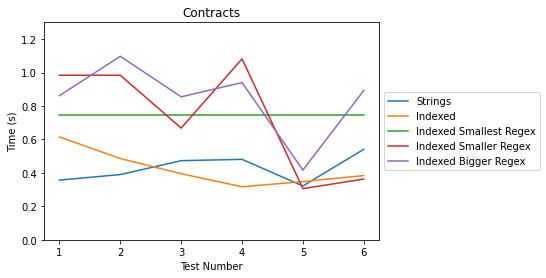

In [47]:
import matplotlib.pyplot as plt

x=[1,2,3,4,5,6]

#contracts
a1=[0.357,0.390,0.473,0.481,0.322,0.541]
a2=[0.615,0.486,0.395,0.317,0.348,0.384]
a9=[0.746,0.746,0.746,0.746,0.746,0.746]
a3=[0.984,0.984,0.668,1.082,0.306,0.363]
a4=[0.862,1.097,0.855,0.940,0.417,0.893]

#documents
a5=[0.176,0.169,0.196,0.276,0.247,0.168,0.147,0.113,0.154,0.136]
a6=[0.397,0.492,0.501,0.378,0.310,0.482,0.449,0.414,0.423,0.684]
a10=[0.466,0.466,0.466,0.466,0.466,0.466,0.476,0.407,0.525,0.419]
a7=[0.440,0.440,0.583,0.604,0.673,0.601,0.497,0.397,0.637,0.668]
a8=[1.092,0.910,0.994,1.081,0.612,0.887,0.918,1.199,1.279,1.183]

plt.plot(x,a1,label='Strings')
plt.plot(x,a2,label='Indexed')
plt.plot(x,a9,label='Indexed Smallest Regex')
plt.plot(x,a3,label='Indexed Smaller Regex')
plt.plot(x,a4,label='Indexed Bigger Regex')
plt.title('Contracts')
plt.ylabel('Time (s)')
plt.ylim(0,1.3)
plt.xlabel('Test Number')
plt.xticks(range(1,7))
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5))

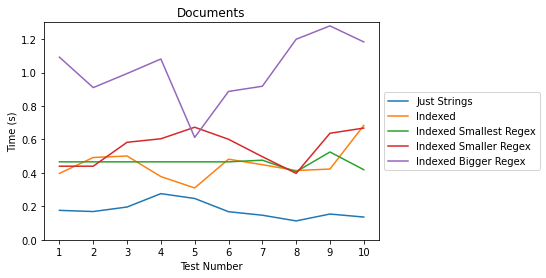

In [51]:
x=[1,2,3,4,5,6,7,8,9,10]

plt.plot(x,a5,label='Just Strings')
plt.plot(x,a6,label='Indexed')
plt.plot(x,a10,label='Indexed Smallest Regex')
plt.plot(x,a7,label='Indexed Smaller Regex')
plt.plot(x,a8,label='Indexed Bigger Regex')
plt.title('Documents')
plt.ylabel('Time (s)')
plt.ylim(0,1.3)
plt.xlabel('Test Number')
plt.xticks(range(1,11))
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5))